In [83]:
import requests
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict

## Read Fresh Vegetables data from USDA website into csv and then load into data frame

In [84]:
url = 'https://www.ers.usda.gov/webdocs/DataFiles/54529/SandU%20Fresh.xlsx?v=43189'
r = requests.get(url)
with open("fresh.csv",'wb') as f:
    f.write(r.content)

In [85]:
# Load fresh.csv into dataframe
# fresh.csv has 32 sheets for 32 vegetables. Hence loading all the the sheets into one single dataframe
column_names = ['Vegetable','Year','Production','Imports','Supply','Exports','Domestic_Availability','Per_Capita_Availability','Current_Dollars','Constant_2009_Dollars']
fresh_df = pd.DataFrame(columns=column_names)
for i in range(1,31):
    temp_df= pd.read_excel("fresh.csv", sheet_name=i)
    if temp_df.shape[1] == 9: # to remove those sheets which have more than 9 columns
        # Get the vegetable name and insert as the first column of the dataframe
        col1 =temp_df.columns[0]
        beg_pos = 15
        end_pos = col1.find(':')
        veg_name = col1[beg_pos:end_pos]
        veg_name = veg_name.replace(', all uses','')
        veg_name = veg_name.replace('fresh ','')
        temp_df.insert(loc=0, column='Vegetable', value=veg_name) 
        
        # now rename the columns and concatenate the DF
        temp_df.columns = column_names
        fresh_df = pd.concat([fresh_df,temp_df.iloc[4:51]], ignore_index  = True) # only rows between 4 and 51 are relevant

In [86]:
fresh_df.shape

(965, 10)

In [87]:
# Write the dataframe data to excel file
writer = pd.ExcelWriter('all_vegetables.xlsx', engine='xlsxwriter')
fresh_df.to_excel(writer, sheet_name='Sheet1')
writer.save()

In [88]:
fresh_df.head()

,Vegetable,Year,Production,Imports,Supply,Exports,Domestic_Availability,Per_Capita_Availability,Current_Dollars,Constant_2009_Dollars
0,artichokes,1971,79.2,26.1,105.3,--,105.3,0.507076,9.72,40.5608
1,artichokes,1972,71,46.8,117.8,--,117.8,0.56123,11.6,46.3907
2,artichokes,1973,60,43.5,103.5,--,103.5,0.488417,14.5,54.9951
3,artichokes,1974,70.2,37.8,108,--,108,0.505017,17.3,60.2074
4,artichokes,1975,73.4,32.4,105.8,--,105.8,0.489876,16.1,51.2821


### Web scrape the food price index data

In [89]:
page = requests.get('https://ycharts.com/indicators/agriculture_index_world_bank')
page = page.content
soup = bs(page, 'html.parser')
dataTableBox = soup.find('div', {"id": "dataTableBox"})
col1 = []
col2 = []
# get the data from table into lists
for tr in dataTableBox.find_all('tr')[2:]:
    cols = tr.find_all('td')
    if(len(cols) == 0 ): # for empty div comming in between
        continue
#     print(datetime.strptime(cols[0].text, '%m. %d, %y'))
    col1.append(cols[0].text)
    col2.append(float(cols[1].text.strip()))

# Create dataframe from the lists of data
pd1_input_list = {'Month':col1,'Price_Index':col2}
df1 = pd.DataFrame(pd1_input_list)
# Get the year in separate column and get the average price_indices foe each year
df1['Year'] = df1.Month.str.slice(-4)
# Write the dataframe data to excel file
writer = pd.ExcelWriter('monthly_price_index.xlsx', engine='xlsxwriter')
df1.to_excel(writer, sheet_name='Sheet1')
writer.save()

In [90]:
df1

,Month,Price_Index,Year
0,"March 31, 2018",90.37,2018
1,"Feb. 28, 2018",88.92,2018
2,"Jan. 31, 2018",87.52,2018
3,"Dec. 31, 2017",85.38,2017
4,"Nov. 30, 2017",85.96,2017
5,"Oct. 31, 2017",85.59,2017
6,"Sept. 30, 2017",86.33,2017
7,"Aug. 31, 2017",85.30,2017
8,"July 31, 2017",87.57,2017
9,"June 30, 2017",87.05,2017


### Download the data from url into csv

### Getting Data from API:

In [91]:
import requests
import sys
import json

key = 'GlanxFCOEPxiiEXJK37dPGQjnfM0wFfrZf2uuWti'
url = 'https://api.nal.usda.gov/ndb/nutrients/?format=json&api_key=GlanxFCOEPxiiEXJK37dPGQjnfM0wFfrZf2uuWti&nutrients=208&nutrients=203&nutrients=204&nutrients=205&nutrients=291&nutrients=269&nutrients=211&nutrients=212&fg=1100'
response = requests.get(url)
x = response.json()
# df3 = pd.io.json.json_normalize(x['report']['foods'])
# df3.columns = df3.columns.map(lambda x: x.split(".")[-1])

# grab the nutrient information and vegetable name information from nested dict structure from json
my_data = x['report']['foods']
nut_info = [nut for veggie in my_data for nut in veggie['nutrients']] # list of nutrient info
veg = [veggie['name'] for veggie in my_data for nut in veggie['nutrients']] # list of vegetable names - each name is repeated 8 times fro 8 nutrients

#Create dictionary to get just the nutrient value in 'gm' 
gm_dict = {}
gm_dict = defaultdict(list)
for item in nut_info:
    gm_dict['gm'].append(item['gm'])
# create the data frame of the nutrient info - each nutrient values is in each row
nutrients_df_raw = pd.DataFrame(gm_dict)

# get the nutrients in a column format by reshaping the dataframe - total 8 nutrients, so 8 columns are created

nutrients_df_raw = pd.DataFrame(np.reshape(nutrients_df_raw.values,(150,8)), 
                    columns=['Glucose','Fructose','Protein','Sugars','fat','Carbohydrate' , 'Energy', 'Fiber'])
nutrients_df_raw['Veg_full_name'] = veg[0::8] # since each name is repeated 8 times, so grab every eighth name


In [92]:
nutrients_df_raw

,Glucose,Fructose,Protein,Sugars,fat,Carbohydrate,Energy,Fiber,Veg_full_name
0,0.08,0.12,3.99,0.2,0.69,2.1,23,1.9,"Alfalfa seeds, sprouted, raw"
1,0.24,0.02,2.89,0.99,0.34,11.39,51,5.7,"Artichokes, (globe or french), cooked, boiled,..."
2,0.24,0.02,2.89,0.99,0.34,11.95,53,5.7,"Artichokes, (globe or french), cooked, boiled,..."
3,0.42,0.79,2.4,1.3,0.22,4.11,22,2,"Asparagus, cooked, boiled, drained"
4,0.42,0.79,2.4,1.3,0.22,4.11,22,2,"Asparagus, cooked, boiled, drained, with salt"
5,0.65,1,2.2,1.88,0.12,3.88,20,2.1,"Asparagus, raw"
6,0.29,0.33,1.12,0.78,0.46,4.32,22,1.9,"Beans, snap, green, canned, no salt added, dra..."
7,0.63,0.62,1.05,1.44,0.41,4.19,21,1.9,"Beans, snap, green, canned, regular pack, drai..."
8,0.83,1.36,1.98,2.6,0.41,6.98,33,3.4,"Beans, snap, green, frozen, all styles, microw..."
9,0.92,1.04,1.79,2.21,0.21,7.54,33,2.6,"Beans, snap, green, frozen, all styles, unprep..."


### Join Fresh DF and Price index dataframe

In [93]:
pi_by_year = df1.groupby('Year', as_index=False)['Price_Index'].mean() 
pi_by_year['Year'] = pi_by_year['Year'].astype(int) # convert year to int type
# merge fresh_df and pi_by_year on Year column values
final_df = pd.merge(fresh_df, pi_by_year, on="Year",how='left')


In [94]:
final_df

,Vegetable,Year,Production,Imports,Supply,Exports,Domestic_Availability,Per_Capita_Availability,Current_Dollars,Constant_2009_Dollars,Price_Index
0,artichokes,1971,79.2,26.1,105.3,--,105.3,0.507076,9.72,40.5608,NaN
1,artichokes,1972,71,46.8,117.8,--,117.8,0.56123,11.6,46.3907,NaN
2,artichokes,1973,60,43.5,103.5,--,103.5,0.488417,14.5,54.9951,NaN
3,artichokes,1974,70.2,37.8,108,--,108,0.505017,17.3,60.2074,NaN
4,artichokes,1975,73.4,32.4,105.8,--,105.8,0.489876,16.1,51.2821,NaN
5,artichokes,1976,80.6,42.9,123.5,4.6,118.9,0.545325,14.4,43.4796,NaN
6,artichokes,1977,71.3,34.5,105.8,3.8,102,0.463133,19.3,54.8716,NaN
7,artichokes,1978,52.5,58.5,111,3.3,107.7,0.48386,27,71.7265,NaN
8,artichokes,1979,87.3,54,141.3,4,137.3,0.610073,27.7,67.9755,NaN
9,artichokes,1980,79.2,58.5,137.7,4,133.7,0.587109,34.7,78.1092,NaN


### Find the common vegetables in Nutrient DF and Final DF and then merge the two DF 

In [95]:
raw_names_nut = [ item for item in nutrients_df_raw['Veg_full_name'] if item.find('raw') > 0]
# find nutrient information for all the vegetables that are present in the fresh vegetables DF
nutrients_df_raw['Vegetable'] = ''
for veg in final_df['Vegetable'].unique():
    veggie = veg + ', raw'
    raw_veggie = [rnn for rnn in raw_names_nut if veggie.lower() in rnn.lower()]
    if len(raw_veggie) > 0:
        true_idx = nutrients_df_raw['Veg_full_name'] == raw_veggie[0]
        nutrients_df_raw['Vegetable'][true_idx] = veg
# Merge nutrients dataframe and Final DF
final_df = pd.merge(final_df, nutrients_df_raw, on="Vegetable", how = 'left')

# Write the dataframe data to excel file
writer = pd.ExcelWriter('final_data.xlsx', engine='xlsxwriter')
final_df.to_excel(writer, sheet_name='Sheet1')
writer.save()

In [96]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 0 to 964
Data columns (total 20 columns):
Vegetable                  965 non-null object
Year                       965 non-null object
Production                 937 non-null object
Imports                    937 non-null object
Supply                     937 non-null object
Exports                    937 non-null object
Domestic_Availability      937 non-null object
Per_Capita_Availability    937 non-null object
Current_Dollars            937 non-null object
Constant_2009_Dollars      937 non-null object
Price_Index                84 non-null float64
Glucose                    309 non-null object
Fructose                   309 non-null object
Protein                    309 non-null object
Sugars                     309 non-null object
fat                        309 non-null object
Carbohydrate               309 non-null object
Energy                     309 non-null object
Fiber                      309 non-null object
Ve

In [97]:
final_df = final_df[np.isfinite(final_df['Price_Index'])]
#final_df.set_printoptions(max_rows=500)
# final_df
#.isfinite is used to remove all the Nan values

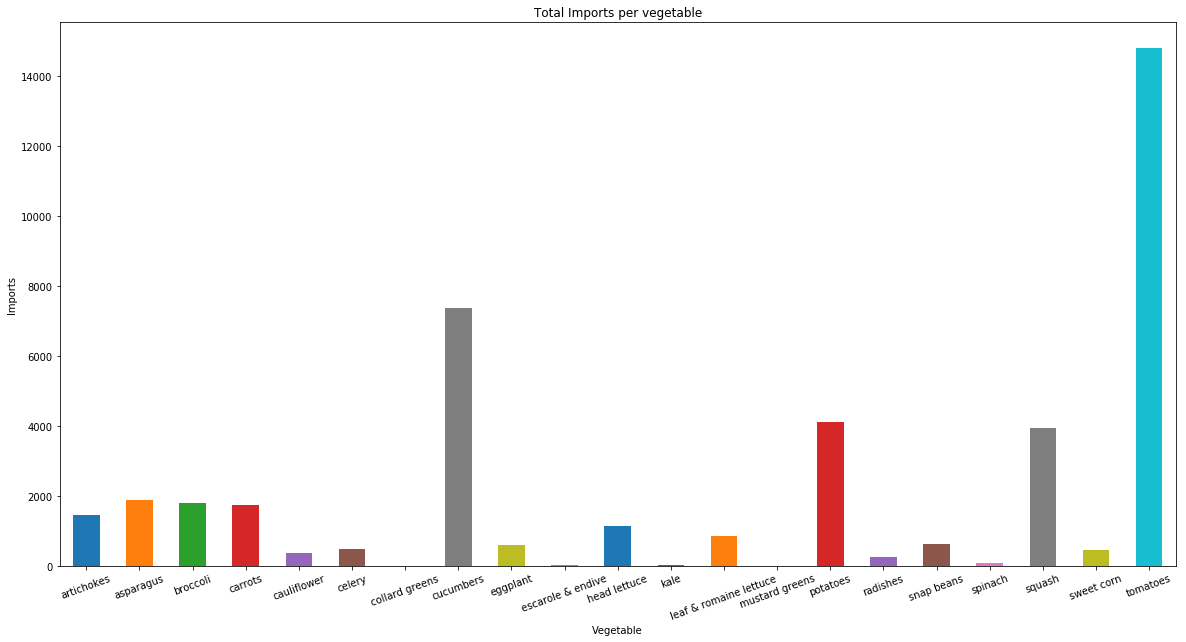

In [98]:
imports = final_df.groupby('Vegetable')['Imports'].sum() 
imports.plot.bar(figsize=(20,10))
plt.title('Total Imports per vegetable')
plt.xticks(rotation=20)
plt.ylabel('Imports')
plt.show()

# Grouping by the vegetable imports
# xticks (rotation = 20), rotates the text 20 degrees

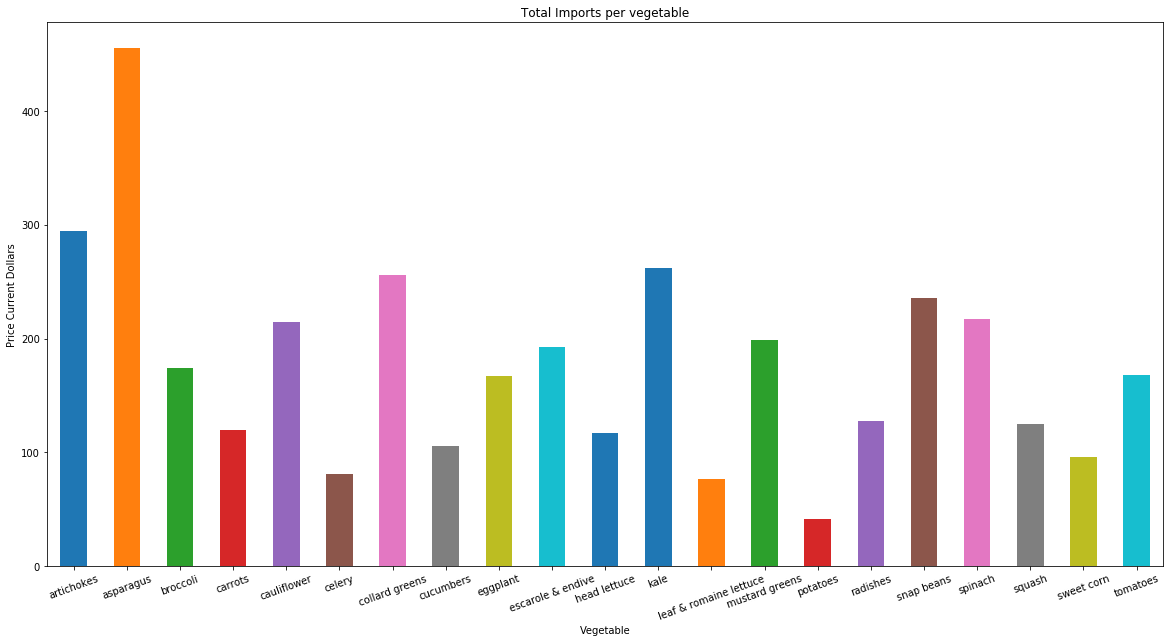

In [99]:
price = final_df.groupby('Vegetable')['Current_Dollars'].sum() 
price.plot.bar(figsize=(20,10))
plt.title('Total Imports per vegetable')
plt.xticks(rotation=20)
plt.ylabel('Price Current Dollars')
plt.show()

#Grouping by the vegetable imports
# xticks (rotation = 20), rotates the text 20 degrees 

In [100]:
pd.options.mode.chained_assignment = None
#The above statement is used to deal with the below warning
#SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
final_df['prod_imp'] = final_df.eval('Production>Imports')
#Creating a new dataframe by evaluating if Production>imports
#The idea is to display the current dollars for vegetables where the production is greater than the imports

In [101]:
Product_greater_imports_true = final_df.loc[final_df['prod_imp']== True]

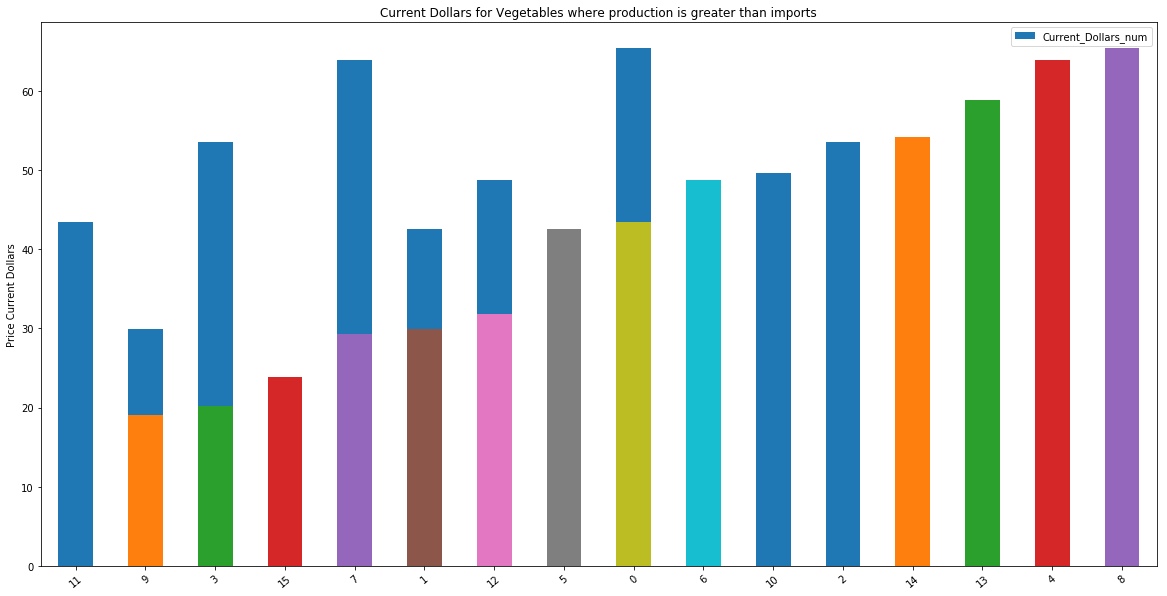

In [102]:
#Product_greater_imports_true['Price_Index'] 
pd.options.mode.chained_assignment = None
Product_greater_imports_true['Current_Dollars_num'] = pd.to_numeric(Product_greater_imports_true['Current_Dollars'])
# using pd.to_numeric to change the type of Current_Dollars from Object to number
Product_greater_imports_true_plot = Product_greater_imports_true.groupby(['Vegetable'], as_index = False)['Current_Dollars_num'].mean()
# grouping by the vegetable Current_dollars and taking the mean of the data 
Product_greater_imports_true_plot.plot.bar(figsize=(20,10))
Product_greater_imports_true_plot.sort_values('Current_Dollars_num', ascending=True)['Current_Dollars_num'].plot.bar(x=Product_greater_imports_true_plot['Vegetable'], stacked=True)
plt.title('Current Dollars for Vegetables where production is greater than imports')
plt.xticks(rotation=40)
plt.ylabel('Price Current Dollars')
plt.show()

In [103]:
final_df['protein_sugars_ratio'] = final_df['Protein'] / final_df['Sugars']
#final_df['protein_sugars_ratio']
#The idea is to display the vegetable dataframe where the ratio of protein content is greater than the sugars

In [104]:
ratio_greater_protein_current = final_df.loc[final_df['protein_sugars_ratio']> 1]
#getting the vegeatables whose protein content is greater than sugars

In [105]:
pd.options.mode.chained_assignment = None
ratio_greater_protein_current['Current_Dollars_num'] = pd.to_numeric(ratio_greater_protein_current['Current_Dollars'])
# using pd.to_numeric to change the type of Current_Dollars from Object to number

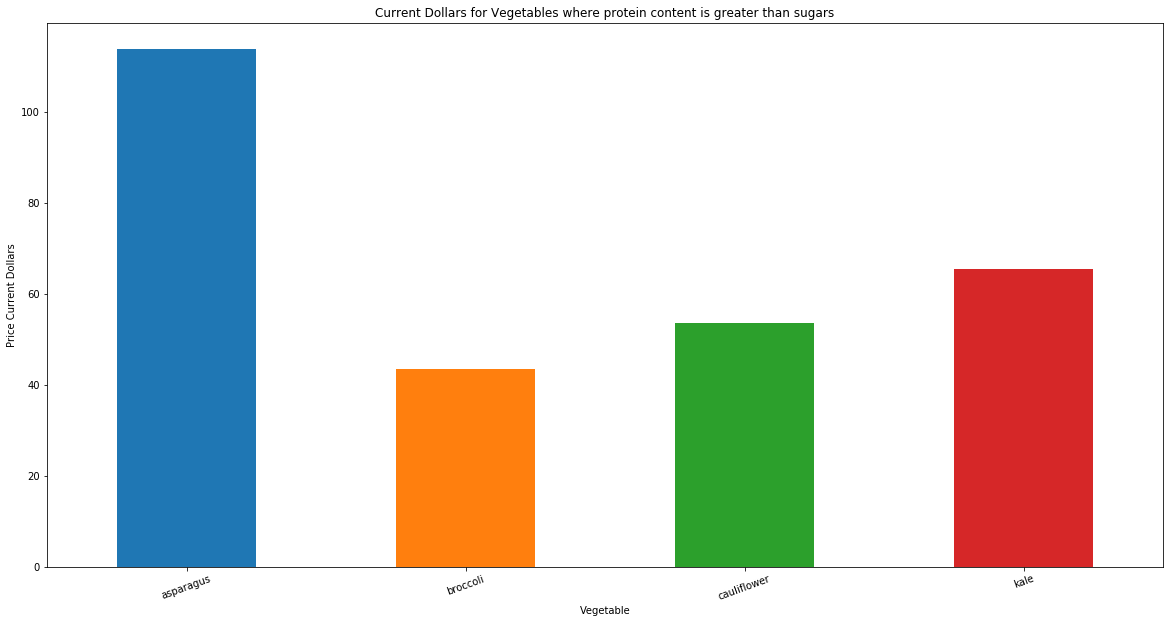

In [106]:
Price_vegetable_greater_protein = ratio_greater_protein_current.groupby(['Vegetable'])['Current_Dollars_num'].mean()
#grouping by the vegetable Current_dollars and taking the mean of the data 
Price_vegetable_greater_protein.plot.bar(figsize=(20,10))
plt.title('Current Dollars for Vegetables where protein content is greater than sugars')
plt.xticks(rotation=20)
plt.ylabel('Price Current Dollars')
plt.show()

In [107]:
final_df['Current_Dollars_num'] = pd.to_numeric(final_df['Current_Dollars'])
#final_df

In [108]:
pd.options.mode.chained_assignment = None
Product_greater_imports_true['Current_Dollars_num'] = pd.to_numeric(Product_greater_imports_true['Current_Dollars'])

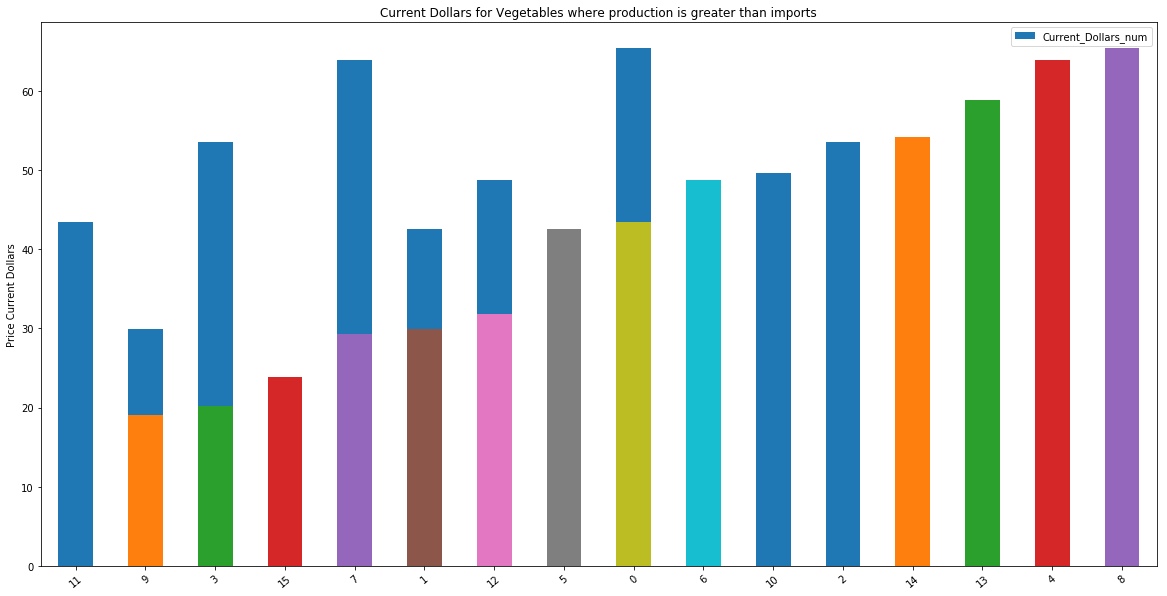

In [109]:
Product_greater_imports_true_plot = Product_greater_imports_true.groupby(['Vegetable'], as_index = False)['Current_Dollars_num'].mean()
#grouping by the vegetable Current_dollars and taking the mean of the data 
Product_greater_imports_true_plot.plot.bar(figsize=(20,10))
Product_greater_imports_true_plot.sort_values('Current_Dollars_num', ascending=True)['Current_Dollars_num'].plot.bar(x=Product_greater_imports_true_plot['Vegetable'], stacked=True)
plt.title('Current Dollars for Vegetables where production is greater than imports')
plt.xticks(rotation=40)
plt.ylabel('Price Current Dollars')
plt.show()

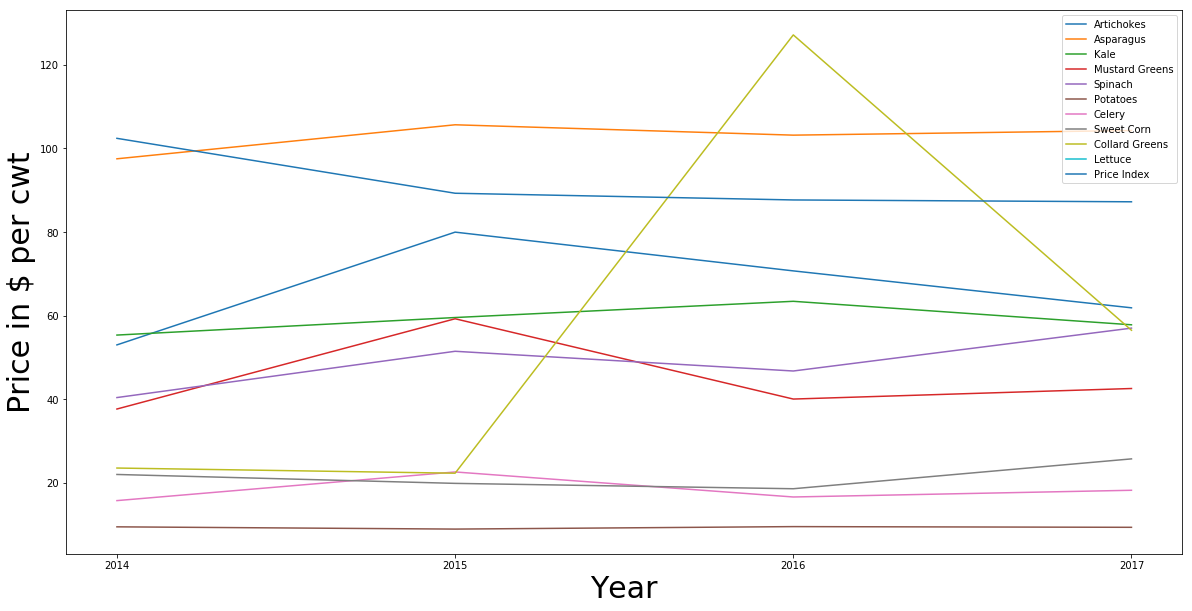

In [111]:
# final_df[:10]
pmi_data = final_df.loc[final_df['Vegetable'].isin(['artichokes'])]
pmi_data2 = final_df.loc[final_df['Vegetable'].isin(['asparagus'])]
pmi_data3 = final_df.loc[final_df['Vegetable'].isin(['kale'])]
pmi_data4 = final_df.loc[final_df['Vegetable'].isin(['mustard greens'])]
pmi_data5 = final_df.loc[final_df['Vegetable'].isin(['spinach'])]
pmi_data6 = final_df.loc[final_df['Vegetable'].isin(['potatoes'])] 
pmi_data7 = final_df.loc[final_df['Vegetable'].isin(['celery'])]
pmi_data8 = final_df.loc[final_df['Vegetable'].isin(['sweet corn'])]
pmi_data9 = final_df.loc[final_df['Vegetable'].isin(['collard greens'])]
pmi_data10 = final_df.loc[final_df['Vegetable'].isin(['leaf & romanie lettuce'])]
# df.loc[df['B'].isin(['one','three'])]
plt.figure(figsize=(20,10))
plt.plot(pmi_data['Year'], pmi_data['Constant_2009_Dollars'], label = 'Artichokes')
plt.plot(pmi_data2['Year'], pmi_data2['Constant_2009_Dollars'], label = 'Asparagus')
plt.plot(pmi_data3['Year'], pmi_data3['Constant_2009_Dollars'], label = 'Kale')
plt.plot(pmi_data4['Year'], pmi_data4['Constant_2009_Dollars'], label = 'Mustard Greens')
plt.plot(pmi_data5['Year'], pmi_data5['Constant_2009_Dollars'], label = 'Spinach')
plt.plot(pmi_data6['Year'], pmi_data6['Constant_2009_Dollars'], label = 'Potatoes')
plt.plot(pmi_data7['Year'], pmi_data7['Constant_2009_Dollars'], label = 'Celery')
plt.plot(pmi_data8['Year'], pmi_data8['Constant_2009_Dollars'], label = 'Sweet Corn')
plt.plot(pmi_data9['Year'], pmi_data9['Constant_2009_Dollars'], label = 'Collard Greens')
plt.plot(pmi_data10['Year'], pmi_data10['Constant_2009_Dollars'], label = 'Lettuce')
plt.plot(pmi_data2['Year'], pmi_data2['Price_Index'],label = 'Price Index')
plt.ylabel('Price in $ per cwt', size = 30)
plt.xlabel('Year', size = 30)
plt.xticks(range(2014, 2018))
plt.legend()
